In [61]:
# Импортируем все необходимые библиотеки
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly
import plotly.express as px

# записываем в переменную churn_data данные из файла
churn_data = pd.read_csv('data/churn.csv')

### 9.1 Определяем соотношение ушедших и лояльных клиентов

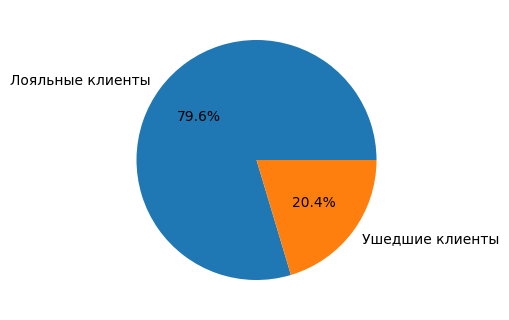

In [62]:
# группируем данные по полю Exited и считаем количество в каждой категории
loyalty_data = churn_data.groupby('Exited')['CustomerId'].count()
# создаем круговую диаграмму 
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    loyalty_data,
    labels=['Лояльные клиенты', 'Ушедшие клиенты'],
    autopct='%.1f%%'
);

**Вывод:** Из всего пула клиентов банка лояльными считаются почти **80%**. Чуть более чем **20%** являются ушедшими. Это достаточно большая доля клиентов - каждый 5й клиент отказывается от услуг банка. 

### 9.2 Определяем распределение баланса клиентов, у которых на счету больше 2,5 тыс. долларов.

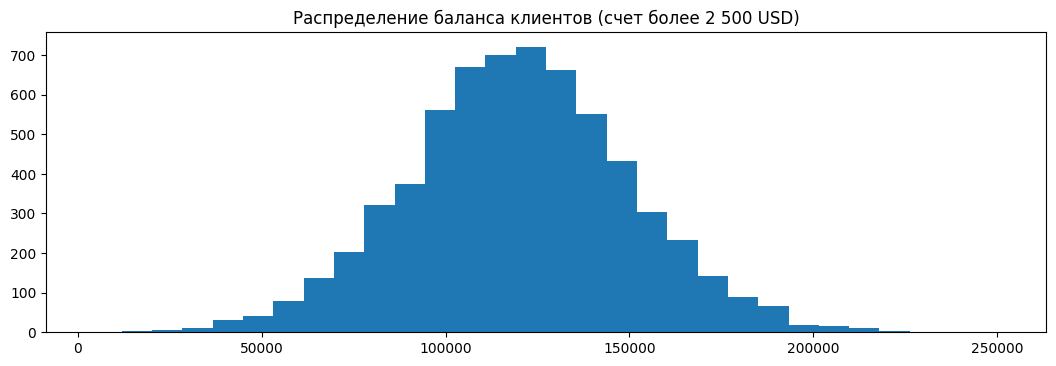

In [63]:
# фильтруем данные, отбирая по условию превышения баланса в размере 2500 долларов
balance_data = churn_data[churn_data['Balance'] > 2500]
# создаем гистограмму распределения балансов клиентов
fig = plt.figure(figsize=(10, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(x=balance_data['Balance'], label='Баланс клиентов', bins=30)
axes.set_title('Распределение баланса клиентов (счет более 2 500 USD)');

**Вывод:** Распределение баланса клиентов банка соответствует нормальному распределению. Средняя величина баланса составляет порядка 120 тыс долларов и такой баланс имеют наибольшее кол-во клиентов.

### 9.3 Определяем распределение баланса клиентов в разрезе признака оттока

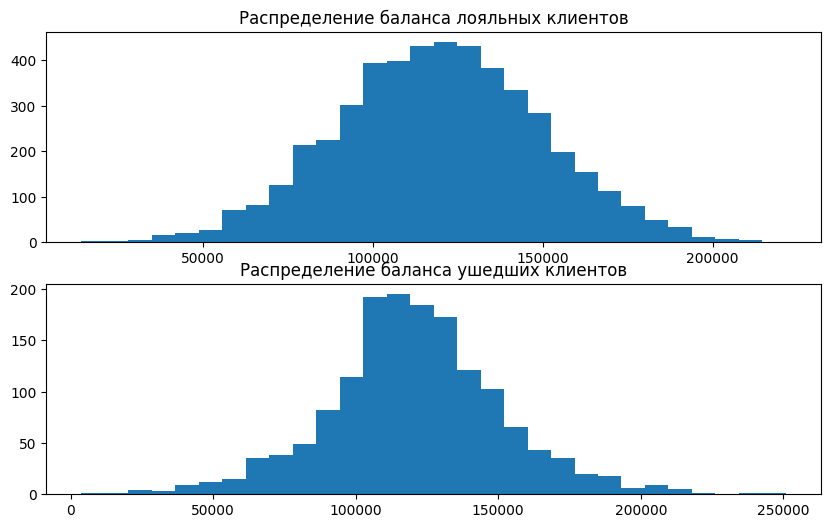

In [64]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

axes[0].hist(
    x=churn_data[(churn_data['Exited'] == 0) & (churn_data['Balance'] > 0)]['Balance'], 
    label='Баланс клиентов', 
    bins=30)
axes[0].set_title('Распределение баланса лояльных клиентов');

axes[1].hist(
    x=churn_data[(churn_data['Exited'] == 1) & (churn_data['Balance'] > 0)]['Balance'], 
    label='Баланс клиентов', 
    bins=30)
axes[1].set_title('Распределение баланса ушедших клиентов');

**Вывод:** Баланс ушедших и лояльных клиентов практически ничем не отличается. Обе величины имеют нормальное распределение. Наибольшее число клиентов в обеих категориях имеют баланс счета от 75 до 175 тыс долларов. В связи с этим величина баланса не является каким-либо признаком, влияющим на уход клиента. Для понимания оттока необходимо проводить анализ по другим параметрам.  

### 9.4 Определяем распределение возраста клиентов в разрезе признака оттока

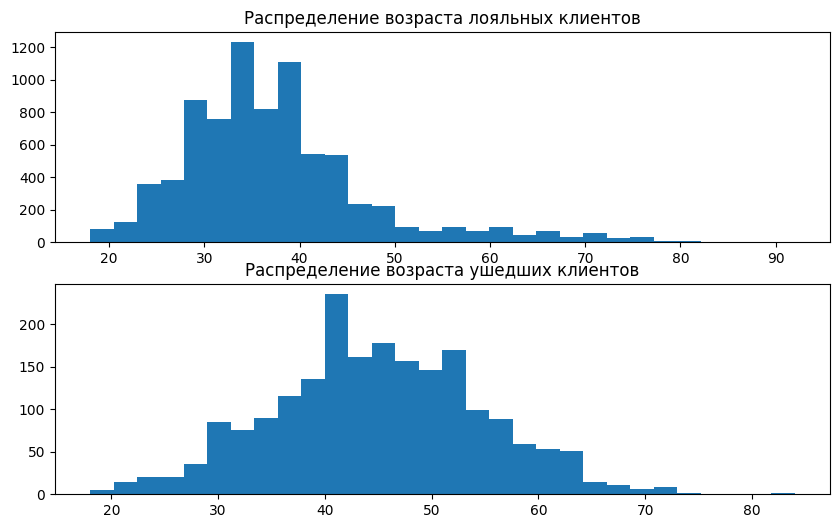

In [65]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 6))

axes[0].hist(
    x=churn_data[churn_data['Exited'] == 0]['Age'],  
    bins=30)
axes[0].set_title('Распределение возраста лояльных клиентов');

axes[1].hist(
    x=churn_data[churn_data['Exited'] == 1]['Age'],  
    bins=30)
axes[1].set_title('Распределение возраста ушедших клиентов');

**Вывод:** Представленное распределения показывает, что наибольшее количество лояльных клиентов достаточно молоды - до 40 лет. Но если рассматривать категорию ушедших клиетов, то их основная масса находится в возрастной категории от 40 лет (причем пик приходится как раз на группу клиентов 40 лет). Поэтому банку стоит обратить особое внимание к возрастным клиентам и детально проанализировать причины их ухода. Возможно банк слишком быстрыми темпами развивает каналы дистанционного банковского обслуживания и клиенты не успевают за технологическим развитием.

### 9.5 Определяем взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты

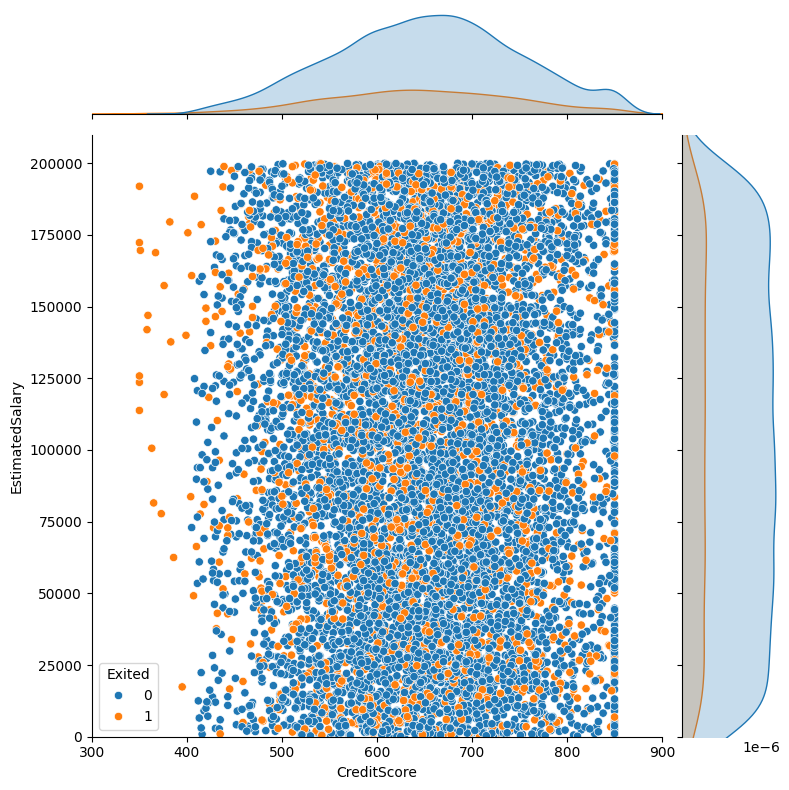

In [66]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (300, 900),
    ylim = (0, 210000),
    height=8,
)

**Вывод:** Судя по представленной диаграмме клиенты с любым кредитным рейтингом могут иметь любую заработную плату (особенно это видно по ряду точек, соответстствующих максимальному кредитному рейтингу). Верно и обратное утверждение - клиенты с любой заработной платой могут получить любой кредитный рейтинг (от минимального до максимального).

Таким образом, никакой взаимосвязи между кредитным рейтингом клиента и его предполагаемой заработной платы не прослеживается. И это верно как применительно к лояльным (синие точки), так и к ушедшим клиентам (оранжевые точки).


### 9.6 Анализ оттока клиентов по половому признаку

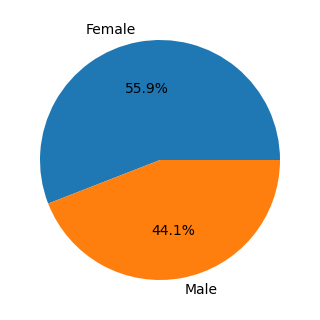

In [67]:
sex_data = churn_data[churn_data['Exited'] == 1].groupby('Gender')['CustomerId'].count()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    sex_data,
    labels=sex_data.index,
    autopct='%.1f%%'
);

**Вывод:** Представленная круговая диаграмма показывает, что среди уходящих клиентов немного преобладают женщины (56% против 44% мужчин).

### 9.7 Определение зависимости оттока клиентов от числа приобретённых у банка услуг

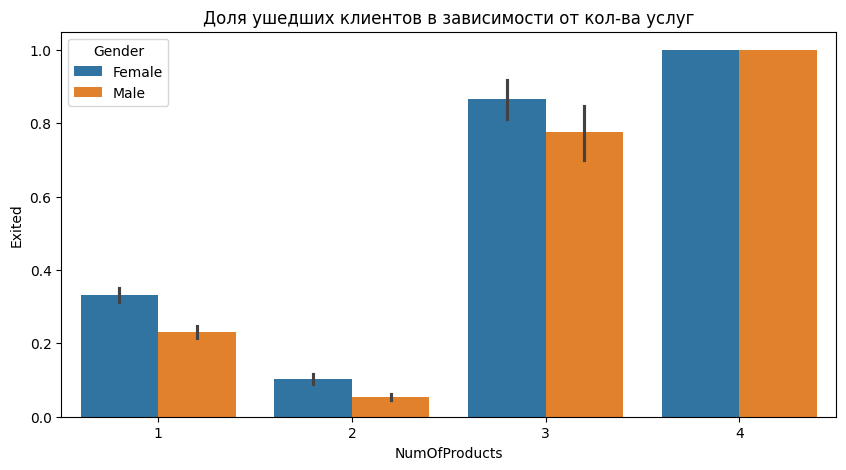

In [68]:
fig = plt.figure(figsize=(10, 5))
barplot = sns.barplot(
    data=churn_data,
    x='NumOfProducts',
    y='Exited',
    hue='Gender',
)
barplot.set_title('Доля ушедших клиентов в зависимости от кол-ва услуг');

**Вывод:** На полученной диаграмме выявляется закономерность, что чем больше у клиента приобретенных услуг, тем более вероятен его уход. Так например все 100% клиентов, имевших 4 приобретенные услуги, ушли из банка. Доля ушедших клиентов, имеющих 3 приобретенные услуги, составляет более 80%, т.е. это тоже очень высокий показатель.

Самые лояльные клиенты пользуются 2 (двумя) банковскими услугами. Среди таких клиентов уходят менее 10%. Лояльность клиентов, пользующихся 1 (одной) услугой уже заменто хуже, среди таких уходят в среднем 25%.

Банку необходимо отдельно обратить внимание на анализ клиентов, пользующихся более чем 2 (двумя) услугами. Возможно в связи с ростом услуг, несоразмерно увеличиваются издержки клиентов (плата за пользование услугами).

### 9.8 Влияние статуса активного клиента на отток клиентов

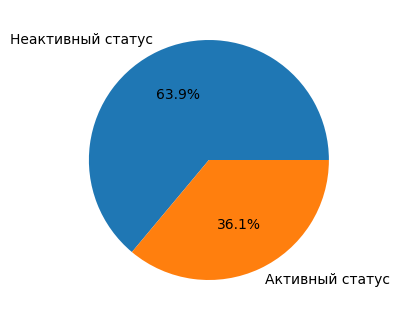

In [69]:
active_data = churn_data[churn_data['Exited'] == 1].groupby('IsActiveMember')['CustomerId'].count()
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    active_data,
    labels=['Неактивный статус', 'Активный статус'],
    autopct='%.1f%%'
);

**Вывод:** Из представленного результатат наглядно видно, что уходу более подвержены клиенты с неактивным статусом (почти 64%). Таким образом банку можно было бы порекомендовать повышать активность клиентов возможно через снижение стоимости услуг.

### 9.9 Отток клиентов в зависимости от страны

In [70]:
country_data_total = churn_data.groupby('Geography')['Exited'].count() # определяем общее кол-во клиентов по странам
country_data_leaved = churn_data.groupby('Geography')['Exited'].sum() # определяем кол-во ушедших клиентов по странам
country_data = (country_data_leaved / country_data_total) * 100 # определяем долю ушедших клиентов по странам (в %)
# строим тепловую картограмму
fig = px.choropleth(
    data_frame=country_data, #DataFrame
    locations=country_data.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой Plotly
    color="Exited", #от чего зависит цвет
    range_color=[0, 50], #диапазон цвета
    title='Доля ушедших клиентов по странам', #заголовок
    width=1000, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
fig.show()

**Вывод:** На полученной тепловой картограмме явно выделяется Германия - более 32% клиентов банка в этой стране не являются лояльными. 

Во Франции и Испании отток клиентов примерно одинаков и составляет порядка 16%, что в два раза ниже, чем в Германии.

Возможные причины наибольшего оттока клиентов в Германии, требующих дополнительного анализа: высокая стоимость услуг банка, наличие в стране иных банков, которые более подходят под требования клиентов.

### 9.10 Взаимосвязь кредитного рейтинга и опыта сотрудничества с банком

In [71]:
# функция для перевода числового признака кредитного рейтинга в категориальный признак
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

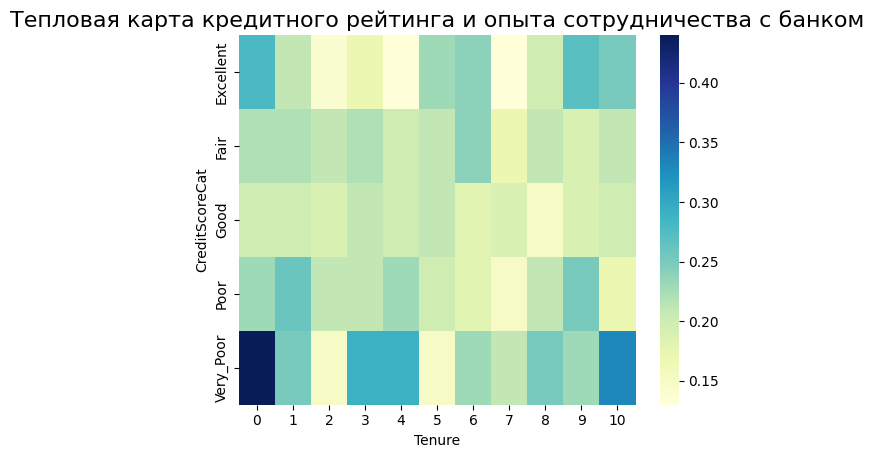

In [72]:
# в массиве данных добавляем колонку с категориальным признаком
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
# Формируем сводную таблицу, значениями которой являются средние показатели ухода клиентов в зависимости от 
# категории кредитного рейтинга (по строкам) и опыта сотрудничества с банком (по столбцам)
pivot_data = churn_data.pivot_table(
    values='Exited',
    index='CreditScoreCat',
    columns='Tenure',
).round(2)
# строим тепловую карту на базе сводной таблицы
heatmap = sns.heatmap(data=pivot_data, cmap='YlGnBu')
heatmap.set_title('Тепловая карта кредитного рейтинга и опыта сотрудничества с банком', fontsize=16);

**Вывод:** Как видно на тепловой карте наибольшая доля уходящих клиентов это те, кто имеет наихудший кредитный рейтинг. Особенно это актуально для новых клиентов, имеющих опыт сотрудичества с банком менее 1 года (в этой категории клиентов уходят более 40%). 

Также можно обратить внимание на достаточно высокий показатель уходящих клиентов с низким кредитным рейтингом, но уже сотрудничающих с банком в течение 10 лет. Можно предположить, что у таких клиентов рейтинг был снижен относительно недавно, и по этой причине они уходят из банка.